In [22]:
# Import required Library

import os
import numpy as np

import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image  import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt

# Data Description

-> Dataset about images of different types of flower

-> Target :- recognition of external flower image 

In [23]:
#  print the datasets 

count = 0

dirs = os.listdir('images/')
for dir in dirs:
    files = list(os.listdir('images/'+dir))
    print(dir + 'Folder has '+ str(len(files)) + ' images')
    count+=len(files)
print('Images Folder has '+ str(count) + ' Images')    

daisyFolder has 764 images
dandelionFolder has 1052 images
roseFolder has 784 images
sunflowerFolder has 733 images
tulipFolder has 984 images
Images Folder has 4317 Images


In [24]:
## Assign image size and batch size for globle

base_dir = 'images/'
img_size = 180
batch = 32

In [25]:
## Load Images In Arrays In Dataset 

train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    batch_size = batch,
    image_size = (img_size,img_size)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    batch_size = batch,
    image_size = (img_size,img_size)
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [26]:
flower_name = train_ds.class_names

# Flower Categories

In [27]:
flower_name

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [28]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Data Augmentation Phase

In [29]:
## Data Augmentation 

data_augmentation = Sequential([
    layers.RandomFlip("horizontal",input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\Keval\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


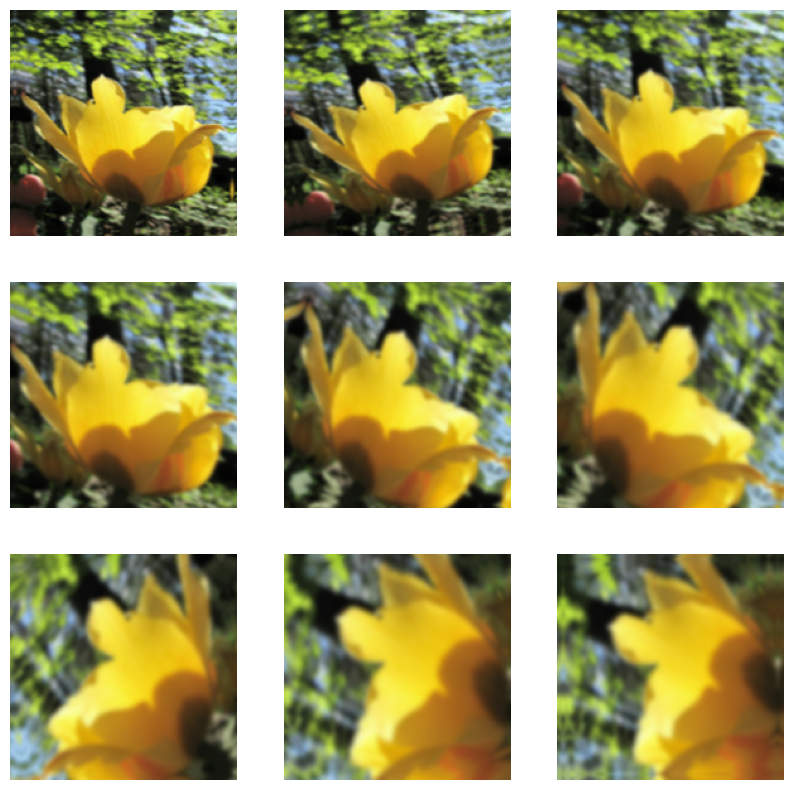

In [30]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[2].numpy().astype('uint8'))
        plt.axis('off')

# Model Training

In [32]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation = 'relu'),
    Dense(5)
])

# Model Compilation

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
# Train the model
history = model.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 225ms/step - accuracy: 0.3082 - loss: 1.4940 - val_accuracy: 0.5597 - val_loss: 1.0979
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 222ms/step - accuracy: 0.5670 - loss: 1.0793 - val_accuracy: 0.6141 - val_loss: 0.9672
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 222ms/step - accuracy: 0.6188 - loss: 0.9559 - val_accuracy: 0.6338 - val_loss: 0.9186
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 222ms/step - accuracy: 0.6670 - loss: 0.8787 - val_accuracy: 0.6535 - val_loss: 0.8769
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 223ms/step - accuracy: 0.6841 - loss: 0.8429 - val_accuracy: 0.6686 - val_loss: 0.8576
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 224ms/step - accuracy: 0.6919 - loss: 0.8038 - val_accuracy: 0.6976 - val_loss: 0.8048
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 224ms/step - accuracy: 0.7187 - loss: 0.7541 - val_accuracy: 0.6744 - val_loss: 0.8297
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 223ms/step - accuracy: 0.7188 - loss: 0

In [36]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_name[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

# Here We predict three different images 

In [37]:
classify_images('Sunflower.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


'The Image belongs to sunflower with a score of 95.08872032165527'

In [38]:
classify_images('tulip.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'The Image belongs to tulip with a score of 87.14521527290344'

In [39]:
classify_images('dandelion.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'The Image belongs to dandelion with a score of 99.44374561309814'